# Descriptive analysis

- Combining whole dataset
- Delete any null
- Make labeling for companies + sentiments
- Define BR, RR and make their analysis

# 1)- Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Visualization 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import datetime as dt
from datetime import datetime
import seaborn as sns
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
from pprint import pprint
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# 2)- Load data

In [179]:
#Loading from firm cleaned file
df = pd.read_excel('descript_file.xlsx')
df=df.drop(['Unnamed: 0', 'code'],axis=1)

In [180]:
df.head()

,TEXT,Sent_type,Date,month_time
0,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31,2018-07
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31,2018-07
2,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31,2018-07
3,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31,2018-07
4,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31,2018-07


In [181]:
df.shape

(455727, 4)

**rename column**

In [182]:
df=df.rename(columns={"Sent_type": "sentiment"})

In [183]:
df.sentiment.value_counts()

Benefit    182533
Neutral    177489
Risky       95705
Name: sentiment, dtype: int64

In [184]:
df.sentiment.value_counts(normalize=True)

Benefit    0.400531
Neutral    0.389463
Risky      0.210005
Name: sentiment, dtype: float64

In [185]:
df.dtypes

TEXT                  object
sentiment             object
Date          datetime64[ns]
month_time            object
dtype: object

### 2.1)- Time series

**Getting only Year, month and day**

In [186]:
df['Date'] = df['Date'].dt.date

**Converting to datetime from Object type**

In [187]:
df['Date'] = pd.to_datetime(df['Date'])

In [188]:
df.dtypes

TEXT                  object
sentiment             object
Date          datetime64[ns]
month_time            object
dtype: object

In [189]:
df['Date'].dt.year[:5]

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Date, dtype: int64

In [190]:
df['Date'].dt.year.sort_values()[:5]

455726    2016
191111    2016
191112    2016
191113    2016
191114    2016
Name: Date, dtype: int64

In [191]:
data_year=df['Date'].dt.year.sort_values()

In [192]:
j=df.groupby(data_year)['sentiment'].value_counts()

In [193]:
j

Date  sentiment
2016  Neutral      66864
      Benefit      62723
      Risky        40369
2017  Neutral      65635
      Benefit      55896
      Risky        23139
2018  Benefit      63779
      Neutral      44901
      Risky        32120
2019  Benefit        135
      Neutral         89
      Risky           77
Name: sentiment, dtype: int64

In [194]:
type(j)

pandas.core.series.Series

In [195]:
j_df=pd.DataFrame(j)

In [196]:
j_df

sentiment
Date sentiment           
2016 Neutral        66864
     Benefit        62723
     Risky          40369
2017 Neutral        65635
     Benefit        55896
     Risky          23139
2018 Benefit        63779
     Neutral        44901
     Risky          32120
2019 Benefit          135
     Neutral           89
     Risky             77

We have problem of two "sentiment"variable in columns. We need to fix it by count() method

### for normalized results

In [197]:
data_year=df['Date'].dt.year.sort_values()

In [198]:
k=df.groupby(data_year)['sentiment'].value_counts(normalize=True)

In [199]:
k

Date  sentiment
2016  Neutral      0.393419
      Benefit      0.369054
      Risky        0.237526
2017  Neutral      0.453688
      Benefit      0.386369
      Risky        0.159943
2018  Benefit      0.452976
      Neutral      0.318899
      Risky        0.228125
2019  Benefit      0.448505
      Neutral      0.295681
      Risky        0.255814
Name: sentiment, dtype: float64

In [200]:
k_df=pd.DataFrame(k)
k_df

sentiment
Date sentiment           
2016 Neutral     0.393419
     Benefit     0.369054
     Risky       0.237526
2017 Neutral     0.453688
     Benefit     0.386369
     Risky       0.159943
2018 Benefit     0.452976
     Neutral     0.318899
     Risky       0.228125
2019 Benefit     0.448505
     Neutral     0.295681
     Risky       0.255814

In [201]:
#In total, RR is
(95705) / (95705+182533) 

0.34396811362933893

In [202]:
#BR is
(182533) / (182533+95705) 

0.6560318863706611

# 3)- Make a dataframe

- For year
- For month

In [21]:
new_df=df[['sentiment','Date']]
new_df.head()

,sentiment,Date
0,Benefit,2018-07-31
1,Neutral,2018-07-31
2,Benefit,2018-07-31
3,Neutral,2018-07-31
4,Neutral,2018-07-31


In [22]:
new_df['year']= new_df['Date'].dt.year

In [23]:
new_df.head()

,sentiment,Date,year
0,Benefit,2018-07-31,2018
1,Neutral,2018-07-31,2018
2,Benefit,2018-07-31,2018
3,Neutral,2018-07-31,2018
4,Neutral,2018-07-31,2018


In [24]:
new_df=new_df.drop('Date', axis=1)

In [25]:
df_ct = (new_df.reset_index()
          .groupby(['year','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'count'})
       )

In [26]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
1,2016,Neutral,66864
2,2016,Risky,40369
3,2017,Benefit,55896
4,2017,Neutral,65635
5,2017,Risky,23139
6,2018,Benefit,63779
7,2018,Neutral,44901
8,2018,Risky,32120
9,2019,Benefit,135


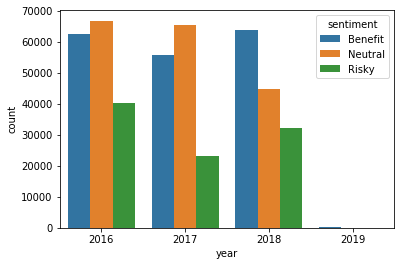

In [27]:
sns.barplot(x="year", y="count",hue="sentiment", data=df_ct);

### RR & BR

### For monthly trend

In [28]:
df.head()

,TEXT,sentiment,Date,month_time
0,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31,2018-07
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31,2018-07
2,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31,2018-07
3,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31,2018-07
4,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31,2018-07


In [29]:
df.dtypes

TEXT                  object
sentiment             object
Date          datetime64[ns]
month_time            object
dtype: object

In [30]:
# making new dataframe
df_month=df[['sentiment','Date']]

In [31]:
df_month['month']=df['Date'].dt.month.sort_values()

In [32]:
df_month.head(2)

,sentiment,Date,month
0,Benefit,2018-07-31,7
1,Neutral,2018-07-31,7


In [33]:
df_month.dtypes

sentiment            object
Date         datetime64[ns]
month                 int64
dtype: object

In [34]:
df_month.month.unique()

array([ 7, 12, 10, 11,  2,  4,  1,  5,  9,  3,  8,  6], dtype=int64)

**As we can see that there should be more month from 2016 to 2019. We have not got all month count correct**

# 4)- Fixing month problem

In [35]:
df_month['month_time']=df_month['Date'].dt.to_period('M')

In [36]:
df_month.head()

,sentiment,Date,month,month_time
0,Benefit,2018-07-31,7,2018-07
1,Neutral,2018-07-31,7,2018-07
2,Benefit,2018-07-31,7,2018-07
3,Neutral,2018-07-31,7,2018-07
4,Neutral,2018-07-31,7,2018-07


In [37]:
df_month.dtypes

sentiment             object
Date          datetime64[ns]
month                  int64
month_time         period[M]
dtype: object

In [38]:
df_month['month'].unique()

array([ 7, 12, 10, 11,  2,  4,  1,  5,  9,  3,  8,  6], dtype=int64)

In [39]:
df_month['month_time'].unique()

<PeriodArray>
['2018-07', '2018-12', '2018-10', '2016-11', '2016-02', '2016-04', '2017-07',
 '2016-12', '2017-01', '2017-05', '2017-11', '2016-09', '2017-09', '2016-05',
 '2017-03', '2017-02', '2016-03', '2016-07', '2018-04', '2017-12', '2018-09',
 '2017-08', '2018-08', '2016-06', '2018-03', '2016-08', '2018-02', '2018-05',
 '2017-04', '2017-06', '2018-06', '2016-01', '2016-10', '2018-01', '2017-10',
 '2019-01', '2018-11']
Length: 37, dtype: period[M]

In [40]:
df_month=df_month[['sentiment','month_time']]

In [41]:
df_month.head()

,sentiment,month_time
0,Benefit,2018-07
1,Neutral,2018-07
2,Benefit,2018-07
3,Neutral,2018-07
4,Neutral,2018-07


In [42]:
data_month=df_month['month_time']

In [43]:
df_count = (df_month.reset_index()
          .groupby(['month_time','sentiment'], as_index=False)
          .count()
          # rename isn't strictly necessary here, it's just for readability
          .rename(columns={'index':'ct'})
       )

In [44]:
df_count

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Risky,9337
2,2016-02,Benefit,4773
3,2016-02,Neutral,6173
4,2016-02,Risky,1955
...,...,...,...
103,2018-12,Neutral,3958
104,2018-12,Risky,2510
105,2019-01,Benefit,135
106,2019-01,Neutral,89


We have created plot yet we need clear plots.

### 5- Add RR and BR 

Do it manually

- RR= (RT)/(RT+BT)
- BR= (BT)/(RT+BT)

### 5.1)- For year

We have df_ct for year

In [45]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
1,2016,Neutral,66864
2,2016,Risky,40369
3,2017,Benefit,55896
4,2017,Neutral,65635
5,2017,Risky,23139
6,2018,Benefit,63779
7,2018,Neutral,44901
8,2018,Risky,32120
9,2019,Benefit,135


**Only for Risky and benefit related sentiments**

In [46]:
df_ct=df_ct[df_ct.sentiment!= "Neutral"]

In [47]:
df_ct

,year,sentiment,count
0,2016,Benefit,62723
2,2016,Risky,40369
3,2017,Benefit,55896
5,2017,Risky,23139
6,2018,Benefit,63779
8,2018,Risky,32120
9,2019,Benefit,135
11,2019,Risky,77


In [48]:
df.sentiment.value_counts()

Benefit    182533
Neutral    177489
Risky       95705
Name: sentiment, dtype: int64

### RR & BR for year

- RR= (RT)/(RT+BT)
- BR= (BT)/(RT+BT)

In [49]:
a=df_ct
a=a[a.sentiment=='Benefit']
a=a.rename(columns={"count":"benefit"})
a

,year,sentiment,benefit
0,2016,Benefit,62723
3,2017,Benefit,55896
6,2018,Benefit,63779
9,2019,Benefit,135


In [50]:
b=df_ct
b=b[b.sentiment=='Risky']
b=b.rename(columns={"count":"risk"})
b=b.drop(['sentiment', 'year'], axis=1)
b=pd.DataFrame(b, columns=['risk'])
b

,risk
2,40369
5,23139
8,32120
11,77


In [51]:
a['risk'] = [40369 , 23139, 32120, 77]
a

,year,sentiment,benefit,risk
0,2016,Benefit,62723,40369
3,2017,Benefit,55896,23139
6,2018,Benefit,63779,32120
9,2019,Benefit,135,77


In [52]:
# using formula to create new variables
a['RR']=(a['risk'])/(a['risk'] + a['benefit'])
a['BR']=(a['benefit'])/(a['risk'] + a['benefit'])

In [53]:
a

,year,sentiment,benefit,risk,RR,BR
0,2016,Benefit,62723,40369,0.391582,0.608418
3,2017,Benefit,55896,23139,0.292769,0.707231
6,2018,Benefit,63779,32120,0.334936,0.665064
9,2019,Benefit,135,77,0.363208,0.636792


In [54]:
# manually calculated values per year
BR=[0.6084 , 0.7072 , 0.6650 , 0.6367]
RR=[0.3915 , 0.2927 , 0.3349 , 0.3632]

In [55]:
add_values=[0.6084 , 0.3915 , 0.7072 , 0.2927 , 0.6650 , 0.3349 , 0.6367 , 0.3632]

In [56]:
df_ct['ratio']= add_values

In [57]:
df_ct

,year,sentiment,count,ratio
0,2016,Benefit,62723,0.6084
2,2016,Risky,40369,0.3915
3,2017,Benefit,55896,0.7072
5,2017,Risky,23139,0.2927
6,2018,Benefit,63779,0.6650
8,2018,Risky,32120,0.3349
9,2019,Benefit,135,0.6367
11,2019,Risky,77,0.3632


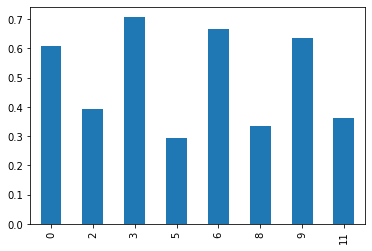

In [58]:
df_ct.ratio.plot(kind='bar')

### A neat plot

For BR and RR w.r.t year

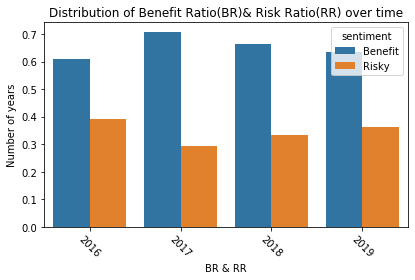

In [59]:
ax = sns.barplot(x="year", y="ratio", hue="sentiment", data=df_ct)
# Rotate x-labels
plt.xticks(rotation=-45)
# for text labeling on axis
plt.xlabel("BR & RR")
plt.ylabel("Number of years")
plt.title("Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over time")
plt.tight_layout()
plt.show()

### For Stack chart

In [60]:
BR=[0.6084 , 0.7072 , 0.6650 , 0.6367]
RR=[0.3915 , 0.2927 , 0.3349 , 0.3632]

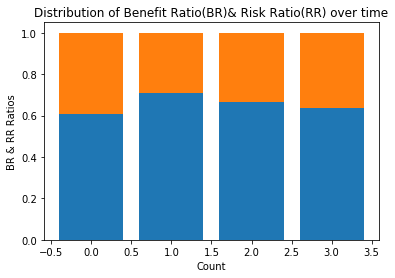

In [61]:
plt.bar(range(len(BR)), BR)
plt.bar(range(len(RR)), RR, bottom=BR)
plt.xlabel("Count")
plt.ylabel("BR & RR Ratios")
plt.title("Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over time")
plt.show()

### Better chart with year as x , ratios as y

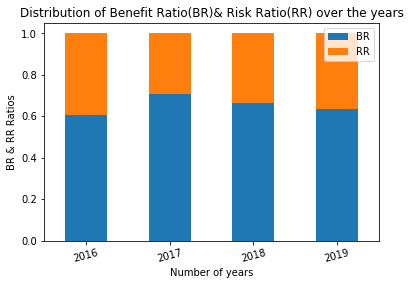

In [62]:
data={"BR":[0.6084 , 0.7072 , 0.6650 , 0.6367],
      "RR":[0.3915 , 0.2927 , 0.3349 , 0.3632]
     };
index=["2016", "2017","2018","2019"]
#Dictionary loaded into a dataframe

df_strackchart=pd.DataFrame(data=data , index=index);

#Ploting stack chart

df_strackchart.plot.bar(stacked=True , rot=15 , title= "Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over the years")
plt.xlabel("Number of years")
plt.ylabel("BR & RR Ratios")
plt.show(block=True);

# 6)- Plotting sentiments against month

- Plot risk against month-year
- plot benefit against month-year

In [63]:
df_count

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Risky,9337
2,2016-02,Benefit,4773
3,2016-02,Neutral,6173
4,2016-02,Risky,1955
...,...,...,...
103,2018-12,Neutral,3958
104,2018-12,Risky,2510
105,2019-01,Benefit,135
106,2019-01,Neutral,89


In [64]:
df_count.shape

(108, 3)

In [65]:
df_count.head()

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Risky,9337
2,2016-02,Benefit,4773
3,2016-02,Neutral,6173
4,2016-02,Risky,1955


In [66]:
q=df_count

In [67]:
q=q[q.sentiment!= "Neutral"]

In [68]:
q.shape

(74, 3)

### Calculating BR & RR 

In [69]:
q.head()

,month_time,sentiment,ct
0,2016-01,Benefit,5021
1,2016-01,Risky,9337
2,2016-02,Benefit,4773
4,2016-02,Risky,1955
5,2016-03,Benefit,5378


In [70]:
q.tail()

,month_time,sentiment,ct
101,2018-11,Risky,2172
102,2018-12,Benefit,5361
104,2018-12,Risky,2510
105,2019-01,Benefit,135
107,2019-01,Risky,77


In [71]:
df_time=q['month_time']

In [72]:
len(list(df_time))

74

In [73]:
df_br=q[q.sentiment== 'Benefit']

In [74]:
count_BR= df_br['ct']

In [75]:
df_rr=q[q.sentiment== 'Risky']

In [76]:
count_RR=df_rr['ct']

In [77]:
type(count_BR)

pandas.core.series.Series

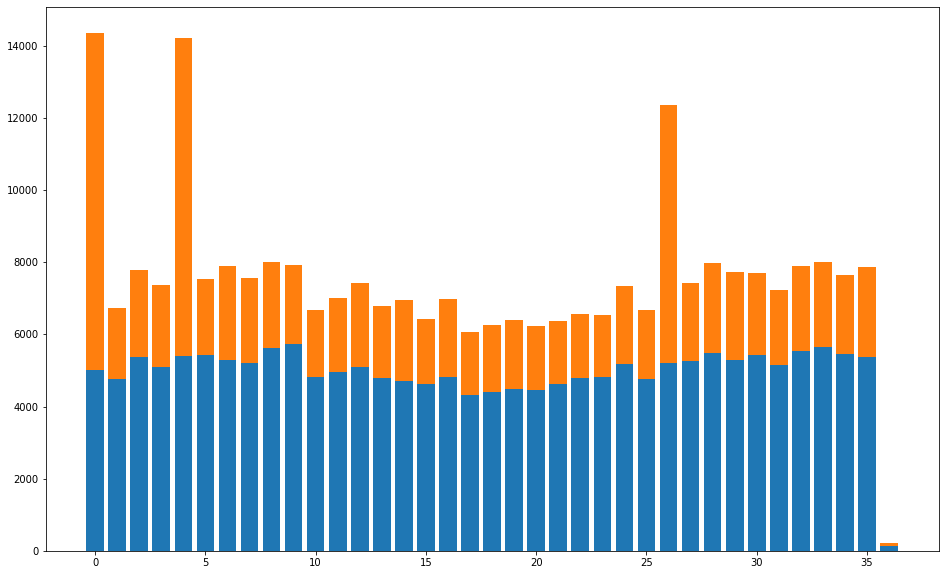

In [99]:
plt.bar(range(len(count_BR)), count_BR)
plt.bar(range(len(count_RR)), count_RR, bottom=count_BR)
plt.show()

### Better chart with months as x , ratios as y

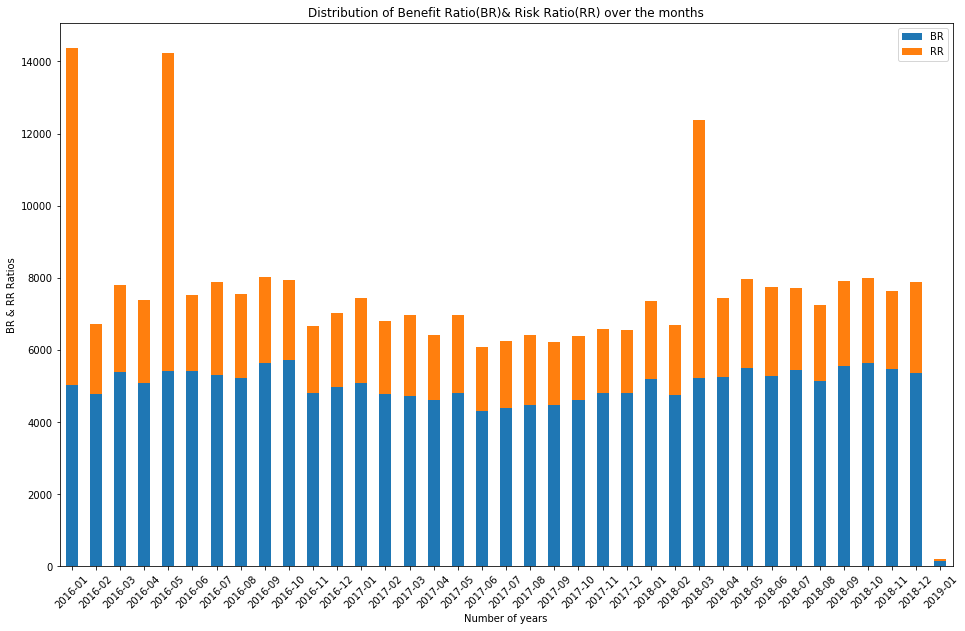

In [98]:
data={"BR": list(count_BR),
      "RR": list(count_RR)
     };
index=["2016-01","2016-02","2016-03","2016-04","2016-05","2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12",
      "2017-01","2017-02","2017-03","2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12",
       "2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12",
       "2019-01"]
#Dictionary loaded into a dataframe
df_strackchart=pd.DataFrame(data=data , index=index);

#Ploting stack chart

df_strackchart.plot.bar(stacked=True , rot=45 , title= "Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over the months")
plt.xlabel("Number of years")
plt.ylabel("BR & RR Ratios")
plt.show(block=True);

### For Only RR and BR

Our above plot is not plotted for as per ratio

In [80]:
data={"Ben": list(count_BR),
      "Risk": list(count_RR)
     };
index=["2016-01","2016-02","2016-03","2016-04","2016-05","2016-06","2016-07","2016-08","2016-09","2016-10","2016-11","2016-12",
      "2017-01","2017-02","2017-03","2017-04","2017-05","2017-06","2017-07","2017-08","2017-09","2017-10","2017-11","2017-12",
       "2018-01","2018-02","2018-03","2018-04","2018-05","2018-06","2018-07","2018-08","2018-09","2018-10","2018-11","2018-12",
       "2019-01"]
#Dictionary loaded into a dataframe
df_strackchart=pd.DataFrame(data=data , index=index);

In [81]:
df_strackchart.head()

,Ben,Risk
2016-01,5021,9337
2016-02,4773,1955
2016-03,5378,2408
2016-04,5092,2291
2016-05,5400,8824


In [82]:
w=df_strackchart

In [83]:
# using formula to create new variables
w['RR']=(w['Risk'])/(w['Risk']+w['Ben'])
w['BR']=(w['Ben'])/(w['Risk']+w['Ben'])

In [84]:
w.head()

,Ben,Risk,RR,BR
2016-01,5021,9337,0.650299,0.349701
2016-02,4773,1955,0.290577,0.709423
2016-03,5378,2408,0.309273,0.690727
2016-04,5092,2291,0.310307,0.689693
2016-05,5400,8824,0.620360,0.379640


In [85]:
df_strackchart= w.drop(['Ben','Risk'], axis=1)

In [86]:
df_strackchart.head()

,RR,BR
2016-01,0.650299,0.349701
2016-02,0.290577,0.709423
2016-03,0.309273,0.690727
2016-04,0.310307,0.689693
2016-05,0.620360,0.379640


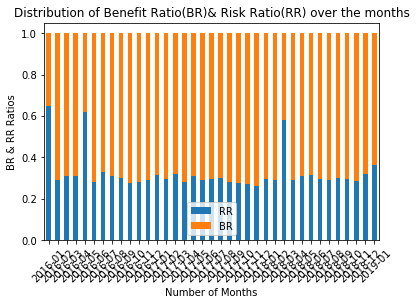

In [87]:
#Ploting stack chart

df_strackchart.plot.bar(stacked=True , rot=45 , title= "Distribution of Benefit Ratio(BR)& Risk Ratio(RR) over the months")
plt.xlabel("Number of Months")
plt.ylabel("BR & RR Ratios")
plt.show(block=True);

### 6a)- For Risk Related Sentiments

In [88]:
r=q

In [89]:
r=r[r.sentiment=='Risky']

In [90]:
r.shape

(37, 3)

In [91]:
r.head()

,month_time,sentiment,ct
1,2016-01,Risky,9337
4,2016-02,Risky,1955
7,2016-03,Risky,2408
10,2016-04,Risky,2291
12,2016-05,Risky,8824


In [92]:
r.month_time.unique()

<PeriodArray>
['2016-01', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07',
 '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-01', '2017-02',
 '2017-03', '2017-04', '2017-05', '2017-06', '2017-07', '2017-08', '2017-09',
 '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03', '2018-04',
 '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11',
 '2018-12', '2019-01']
Length: 37, dtype: period[M]

In [93]:
type(r)

pandas.core.frame.DataFrame

In [94]:
r.sentiment.value_counts()

Risky    37
Name: sentiment, dtype: int64

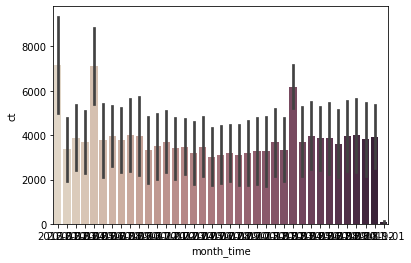

In [95]:
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)

### Change figure size

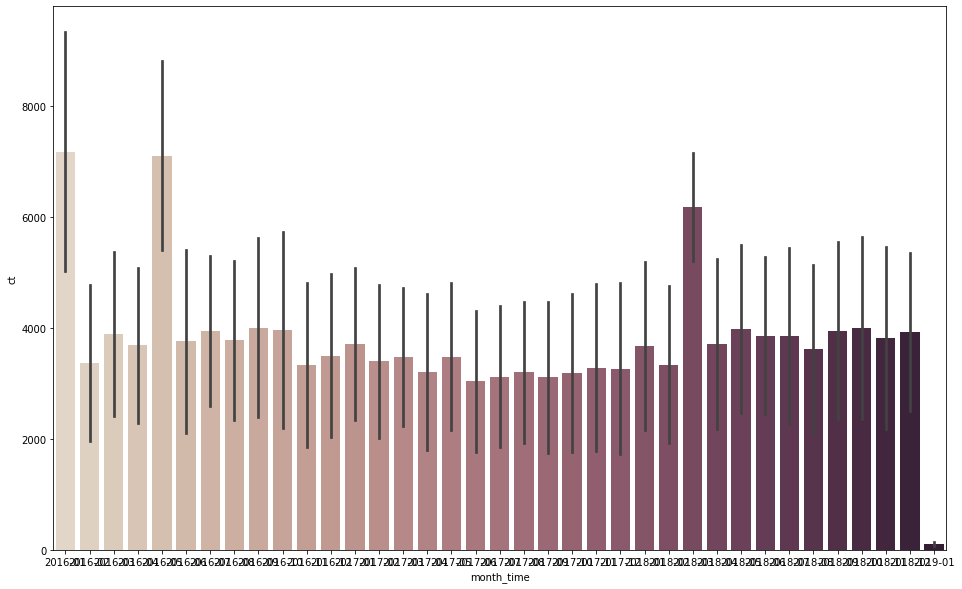

In [96]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)
plt.show()

### Rotate the ticklabels

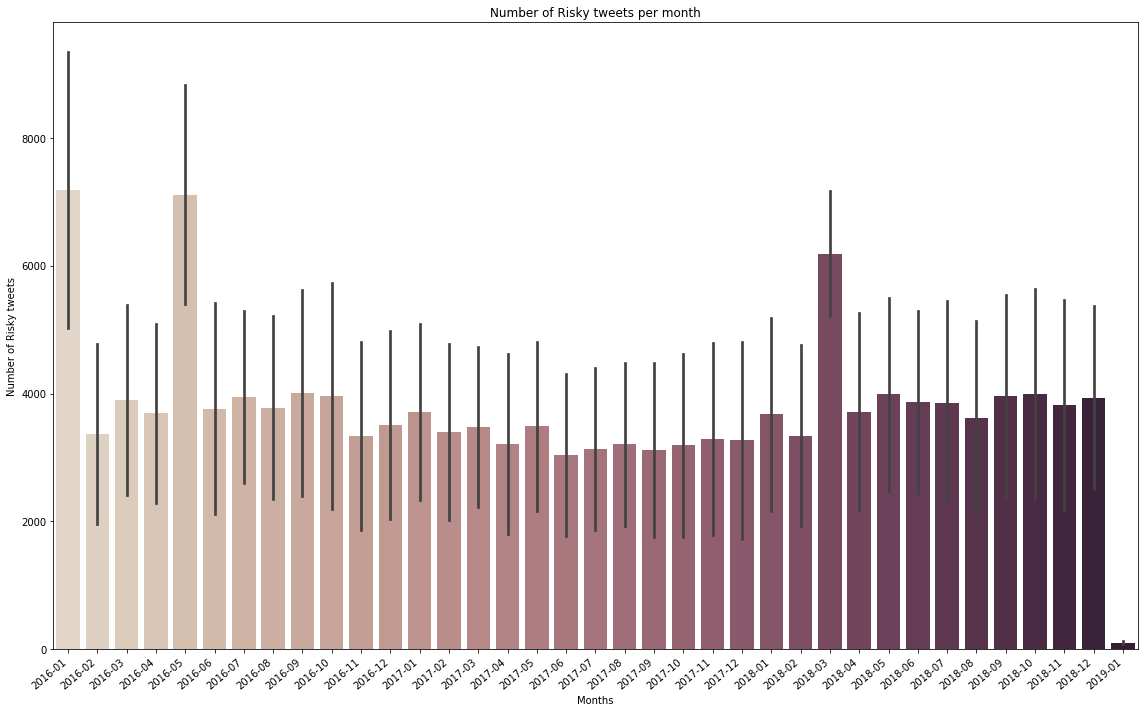

In [97]:
ax = sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=q)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.xlabel("Months")
plt.ylabel("Number of Risky tweets")
plt.title("Number of Risky tweets per month")
plt.tight_layout()
plt.show()

### 6b.for beneficial sentiments

In [100]:
b=df_count

In [101]:
b=b[b.sentiment=='Benefit']

In [102]:
b.shape

(37, 3)

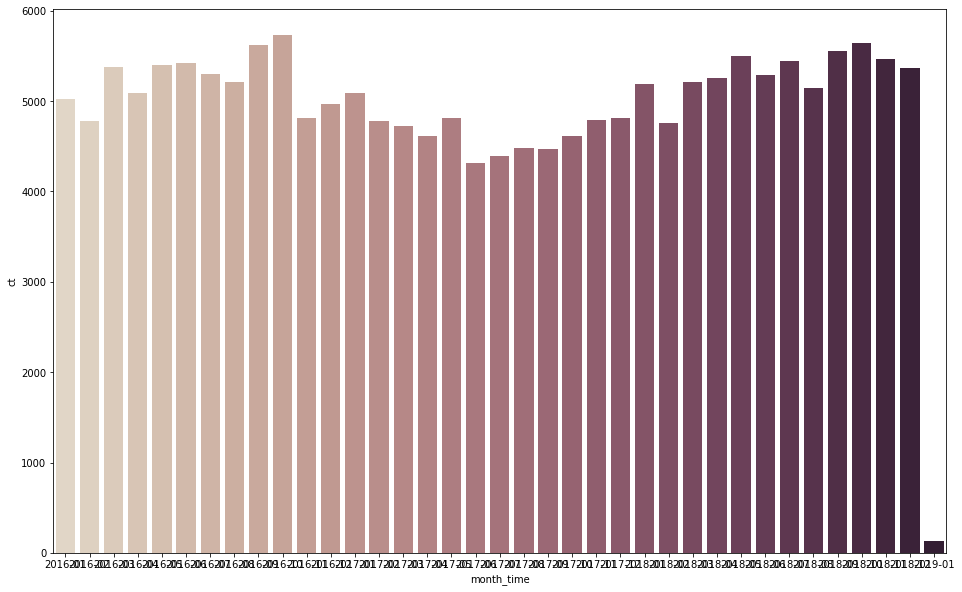

In [103]:
plt.rcParams["figure.figsize"] = (16, 10)
plt.rcParams["xtick.labelsize"] = 10
plt.figure(figsize=(16,10)) # this creates a figure 16 inch wide, 10 inch high
sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=b)
plt.show()

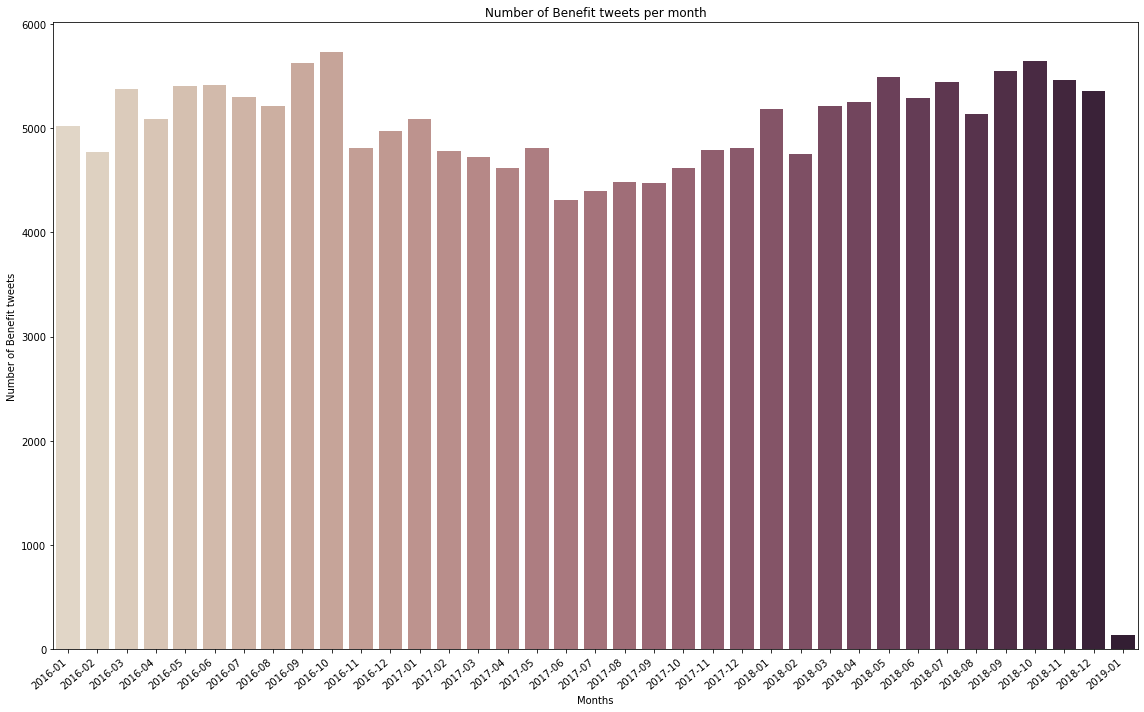

In [104]:
ax = sns.barplot(x="month_time", y= "ct",palette="ch:.25", data=b)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.xlabel("Months")
plt.ylabel("Number of Benefit tweets")
plt.title("Number of Benefit tweets per month")
plt.tight_layout()
plt.show()

**We shall work from here**


- Problem of sorting
- make word cloud with risk vs benefit

# 7)- Getting company names
from company_label notebook

In [105]:
df.head(2)

,TEXT,sentiment,Date,month_time
0,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31,2018-07
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31,2018-07


In [106]:
df.shape

(455727, 4)

In [107]:
company = pd.read_pickle('company_label.pkl')

In [108]:
company.head(2)

,TEXT,UTC DATE,month,year,Google,google,tesla,gm,apple,ford,...,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,7,2018,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,7,2018,False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [109]:
company.shape

(455726, 24)

### 7.1)- Merging dataframes



In [110]:
company=company.drop(['TEXT','UTC DATE','month','year','Google'],axis=1)

In [111]:
company.shape

(455726, 19)

In [112]:
company['sentiment']=df['sentiment']

In [113]:
company.shape

(455726, 20)

**check missing values**

In [114]:
company.isnull().sum()

google          0
tesla           0
gm              0
apple           0
ford            0
daimler-benz    0
volkswagen      0
bmw             0
audi            0
porsche         0
opel            0
waymo           0
aptiv           0
intel           0
baidu           0
toyota          0
renault         0
mitsubishi      0
nissan          0
sentiment       0
dtype: int64

### 7.2 Ploting companies vs total number of tweets

In [115]:
company.columns

Index(['google', 'tesla', 'gm', 'apple', 'ford', 'daimler-benz', 'volkswagen',
       'bmw', 'audi', 'porsche', 'opel', 'waymo', 'aptiv', 'intel', 'baidu',
       'toyota', 'renault', 'mitsubishi', 'nissan', 'sentiment'],
      dtype='object')

In [116]:
c=company

In [117]:
c.head()

,google,tesla,gm,apple,ford,daimler-benz,volkswagen,bmw,audi,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan,sentiment
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Benefit
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Benefit


In [118]:
plot_c=c.drop('sentiment', axis=1)

In [119]:
plot_c.shape

(455726, 19)

In [120]:
# add all value

plot_var_c=plot_c.sum(axis=0)

In [121]:
plot_sort_c=plot_var_c.sort_values()
plot_sort_c

daimler-benz       51
mitsubishi        198
aptiv             250
baidu             710
renault           927
opel              940
nissan           1640
toyota           3070
intel            3442
waymo            3612
apple            4499
google           8732
volkswagen      18324
ford            18524
tesla           22601
gm              31711
audi            45766
porsche         65246
bmw             71294
dtype: int64

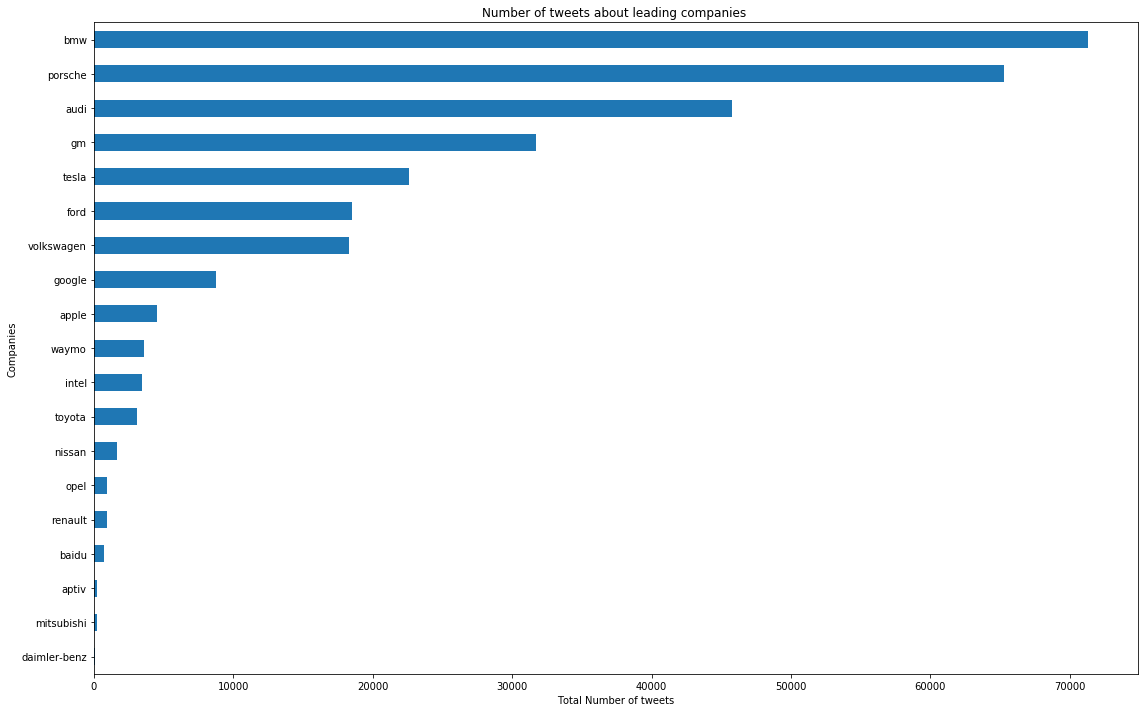

In [122]:
plot_sort_c.plot(kind='barh')
plt.xlabel("Total Number of tweets")
plt.ylabel("Companies")
plt.title("Number of tweets about leading companies ")
plt.tight_layout()
plt.show()

### 7.3)-Making two classes only

getting rid of Neutral

In [123]:
company.sentiment.value_counts()

Benefit    182532
Neutral    177489
Risky       95705
Name: sentiment, dtype: int64

In [124]:
company=company[company.sentiment!= "neutral"]

In [125]:
company.shape

(455726, 20)

In [126]:
company.columns

Index(['google', 'tesla', 'gm', 'apple', 'ford', 'daimler-benz', 'volkswagen',
       'bmw', 'audi', 'porsche', 'opel', 'waymo', 'aptiv', 'intel', 'baidu',
       'toyota', 'renault', 'mitsubishi', 'nissan', 'sentiment'],
      dtype='object')

In [127]:
company.head(3)

,google,tesla,gm,apple,ford,daimler-benz,volkswagen,bmw,audi,porsche,opel,waymo,aptiv,intel,baidu,toyota,renault,mitsubishi,nissan,sentiment
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Neutral
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,Benefit
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Neutral


### 7.4)-Plot beneficial tweets vs companies

**filter only for benefit tweets**

In [128]:
b=company

In [129]:
b=b[b.sentiment=="Benefit"]

In [130]:
b.sentiment.value_counts()

Benefit    182532
Name: sentiment, dtype: int64

In [131]:
plot_b=b.drop('sentiment', axis=1)

In [132]:
plot_b.shape

(182532, 19)

In [133]:
# add all value

plot_var_b=plot_b.sum(axis=0)

In [134]:
plot_sort_b=plot_var_b.sort_values()

In [135]:
plot_sort_b

daimler-benz       20
mitsubishi         80
aptiv             122
baidu             155
opel              319
renault           325
nissan            555
waymo             987
toyota           1153
apple            1410
intel            1850
google           2614
volkswagen       6342
ford             7192
tesla            7729
gm              11873
audi            19777
porsche         29235
bmw             30067
dtype: int64

In [136]:
len(plot_sort_b)

19

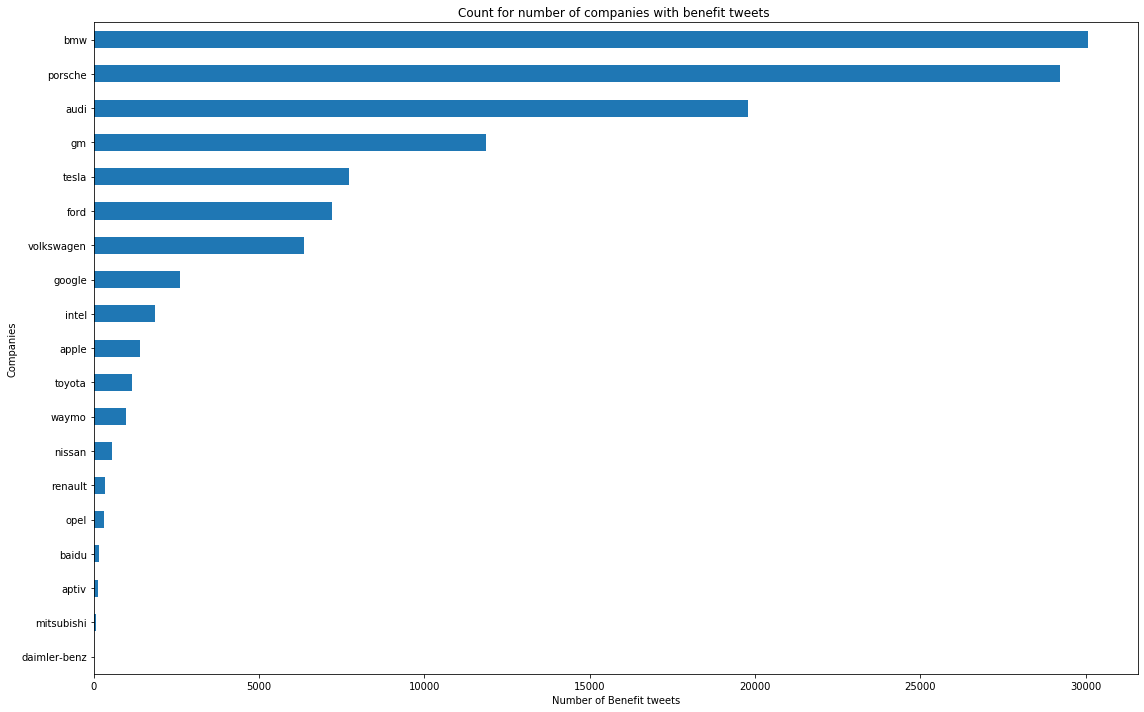

In [137]:
plot_sort_b.plot(kind='barh')
plt.xlabel("Number of Benefit tweets")
plt.ylabel("Companies")
plt.title("Count for number of companies with benefit tweets ")
plt.tight_layout()
plt.show()

### 7.5)-Plot risky tweets vs companies

In [138]:
r=company

In [139]:
r=r[r.sentiment=="Risky"]

In [140]:
r.sentiment.value_counts()

Risky    95705
Name: sentiment, dtype: int64

In [141]:
plot_r=r.drop('sentiment', axis=1)

In [142]:
plot_r.shape

(95705, 19)

In [143]:
# add all values of companies

plot_var_r=plot_r.sum(axis=0)

In [144]:
plot_sort_r=plot_var_r.sort_values()

In [145]:
plot_sort_r

daimler-benz        9
aptiv              28
mitsubishi         47
baidu              61
renault           200
opel              201
intel             297
nissan            390
toyota            726
apple             889
waymo             946
google           2598
ford             3709
volkswagen       4864
tesla            5230
gm               7311
audi             8667
porsche         10009
bmw             13314
dtype: int64

In [146]:
len(plot_sort_r)

19

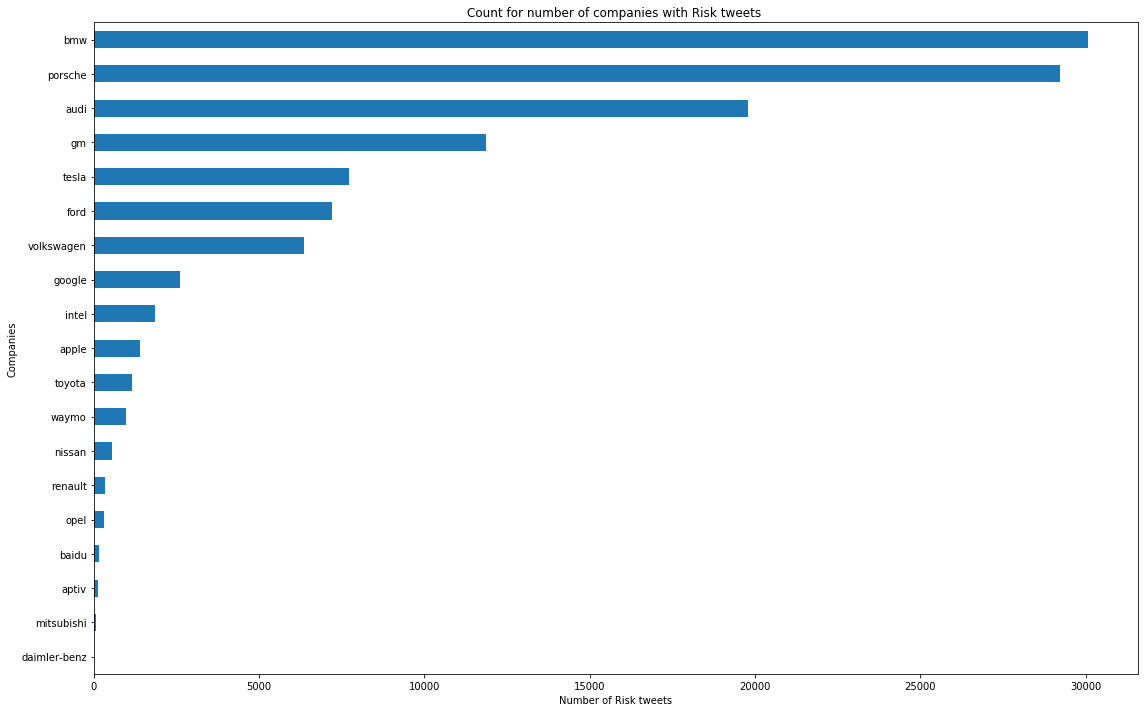

In [147]:
plot_sort_b.plot(kind='barh')
plt.xlabel("Number of Risk tweets")
plt.ylabel("Companies")
plt.title("Count for number of companies with Risk tweets ")
plt.tight_layout()
plt.show()

# 8)- Calculate RR & BR

w.r.t companies now

In [148]:
df_comp = pd.DataFrame(plot_sort_b, columns=['benefit'])
df_comp

,benefit
daimler-benz,20
mitsubishi,80
aptiv,122
baidu,155
opel,319
renault,325
nissan,555
waymo,987
toyota,1153
apple,1410


In [149]:
df_comp2 = pd.DataFrame(plot_sort_r, columns=['risk'])
df_comp2

,risk
daimler-benz,9
aptiv,28
mitsubishi,47
baidu,61
renault,200
opel,201
intel,297
nissan,390
toyota,726
apple,889


In [150]:
df_comp['risk']= df_comp2['risk']

In [151]:
df_comp

,benefit,risk
daimler-benz,20,9
mitsubishi,80,47
aptiv,122,28
baidu,155,61
opel,319,201
renault,325,200
nissan,555,390
waymo,987,946
toyota,1153,726
apple,1410,889


In [152]:
# using formula to create new variables
df_comp['RR']=(df_comp['risk'])/(df_comp['risk']+df_comp['benefit'])
df_comp['BR']=(df_comp['benefit'])/(df_comp['risk']+df_comp['benefit'])

In [153]:
df_comp

,benefit,risk,RR,BR
daimler-benz,20,9,0.310345,0.689655
mitsubishi,80,47,0.370079,0.629921
aptiv,122,28,0.186667,0.813333
baidu,155,61,0.282407,0.717593
opel,319,201,0.386538,0.613462
renault,325,200,0.380952,0.619048
nissan,555,390,0.412698,0.587302
waymo,987,946,0.489395,0.510605
toyota,1153,726,0.386376,0.613624
apple,1410,889,0.386690,0.613310


### 8.a.ploting RR

In [154]:
plot_RR=df_comp.RR.sort_values()

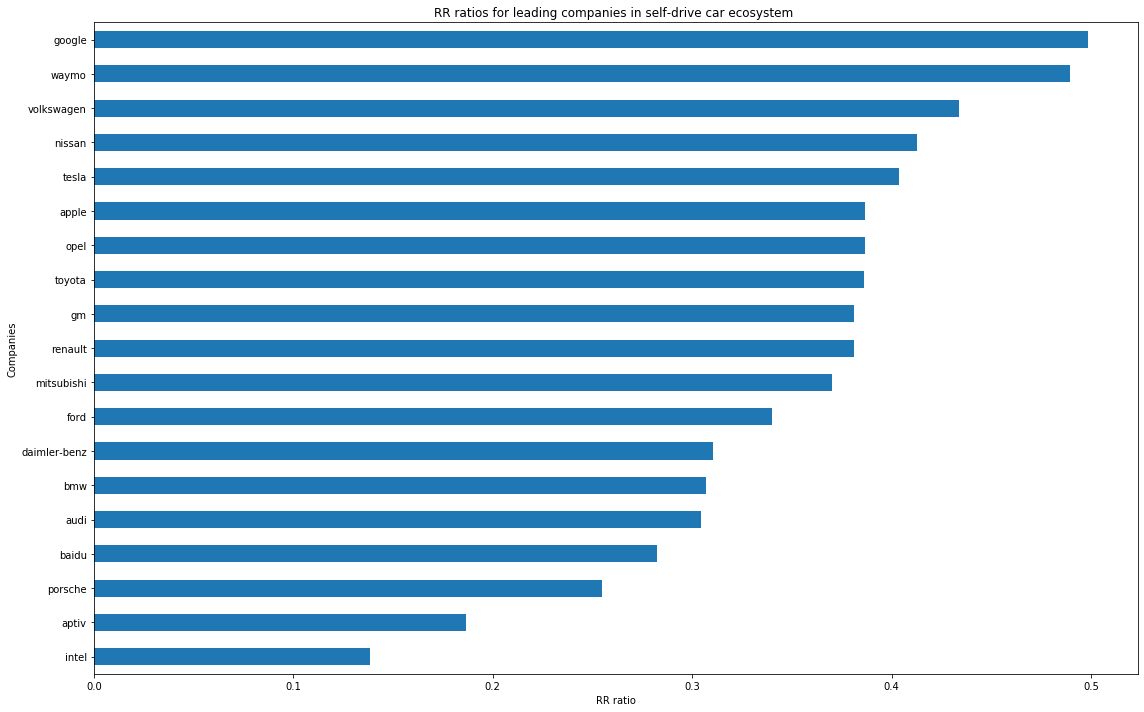

In [155]:
plot_RR.plot(kind='barh')
plt.xlabel("RR ratio")
plt.ylabel("Companies")
plt.title("RR ratios for leading companies in self-drive car ecosystem ")
plt.tight_layout()
plt.show()

### 8.b. plotting BR

In [156]:
plot_BR=df_comp.BR.sort_values()

In [178]:
plot_BR.sort_values()

google          0.501535
waymo           0.510605
volkswagen      0.565947
nissan          0.587302
tesla           0.596419
apple           0.613310
opel            0.613462
toyota          0.613624
gm              0.618901
renault         0.619048
mitsubishi      0.629921
ford            0.659756
daimler-benz    0.689655
bmw             0.693091
audi            0.695296
baidu           0.717593
porsche         0.744955
aptiv           0.813333
intel           0.861667
Name: BR, dtype: float64

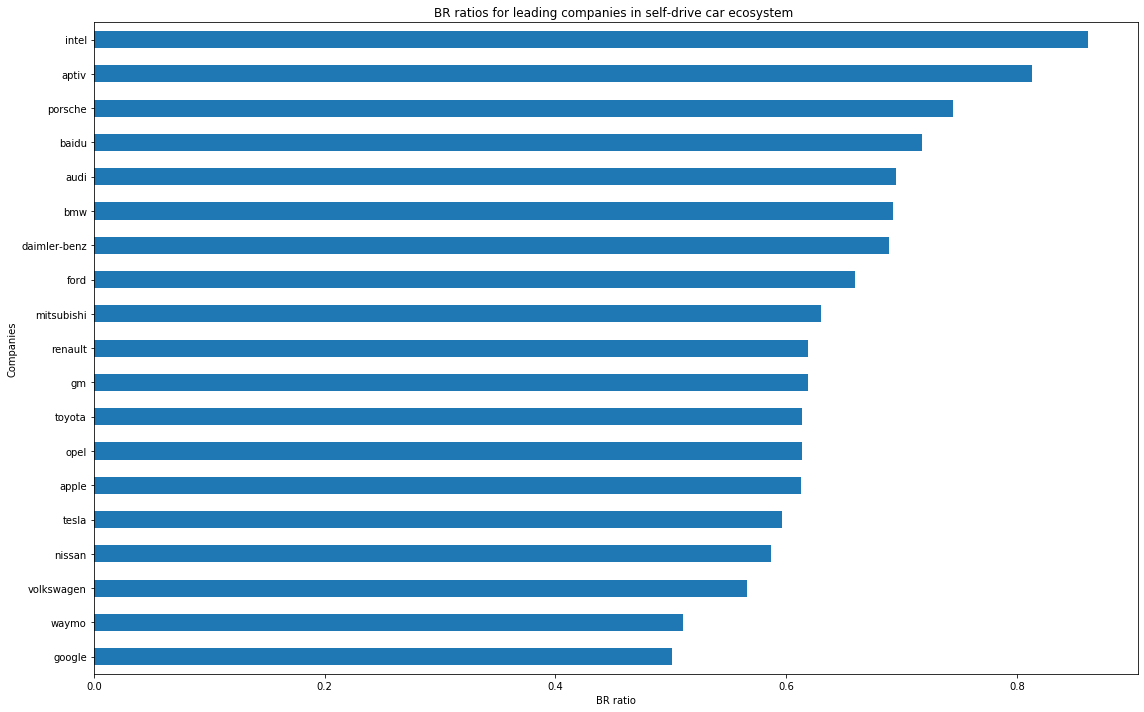

In [157]:
plot_BR.plot(kind='barh')
plt.xlabel("BR ratio")
plt.ylabel("Companies")
plt.title("BR ratios for leading companies in self-drive car ecosystem ")
plt.tight_layout()
plt.show()

# 9)-Submit work

We have three main dataset for which we have processed data, cleaned, implemented model and finally did descriptive analysis.

### 1st dataset

In [158]:
company = pd.read_pickle('company_label.pkl')

In [159]:
company.shape

(455726, 24)

In [160]:
company.columns

Index(['TEXT', 'UTC DATE', 'month', 'year', 'Google', 'google', 'tesla', 'gm',
       'apple', 'ford', 'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche',
       'opel', 'waymo', 'aptiv', 'intel', 'baidu', 'toyota', 'renault',
       'mitsubishi', 'nissan'],
      dtype='object')

In [161]:
company=company.drop(['month','year','Google'],axis=1)

In [162]:
df_submit=company

### 2nd dataset

In [163]:
df.head()

,TEXT,sentiment,Date,month_time
0,"Another reason I failed in love is I'm poor,I ...",Benefit,2018-07-31,2018-07
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,Neutral,2018-07-31,2018-07
2,"Happy birthday to the Audi chasing maniac, hop...",Benefit,2018-07-31,2018-07
3,Come see Mercedes Benz stadium in Atlanta...,Neutral,2018-07-31,2018-07
4,Italy took Cristiano and ever since then they’...,Neutral,2018-07-31,2018-07


In [164]:
df.shape

(455727, 4)

In [165]:
df_submit['sentiment']= df['sentiment']

In [166]:
df_submit.columns

Index(['TEXT', 'UTC DATE', 'google', 'tesla', 'gm', 'apple', 'ford',
       'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche', 'opel', 'waymo',
       'aptiv', 'intel', 'baidu', 'toyota', 'renault', 'mitsubishi', 'nissan',
       'sentiment'],
      dtype='object')

In [167]:
df_submit.shape

(455726, 22)

In [168]:
filename='tweets.csv'
df_org = pd.read_csv(filename, delimiter='\t', header=None,names=['TWEET ID','TIMESTAMP','UTC DATE','USER ID','SCREEN NAME','NAME','Q','TEXT'])

In [169]:
df_org.shape

(455728, 8)

In [170]:
df_org.columns

Index(['TWEET ID', 'TIMESTAMP', 'UTC DATE', 'USER ID', 'SCREEN NAME', 'NAME',
       'Q', 'TEXT'],
      dtype='object')

In [171]:
df_submit[['TWEET ID','TIMESTAMP','USER ID','SCREEN NAME']]=df_org[['TWEET ID','TIMESTAMP','USER ID','SCREEN NAME']]

In [172]:
df_submit.shape

(455726, 26)

In [173]:
df_submit.columns

Index(['TEXT', 'UTC DATE', 'google', 'tesla', 'gm', 'apple', 'ford',
       'daimler-benz', 'volkswagen', 'bmw', 'audi', 'porsche', 'opel', 'waymo',
       'aptiv', 'intel', 'baidu', 'toyota', 'renault', 'mitsubishi', 'nissan',
       'sentiment', 'TWEET ID', 'TIMESTAMP', 'USER ID', 'SCREEN NAME'],
      dtype='object')

In [174]:
df_submit.head()

,TEXT,UTC DATE,google,tesla,gm,apple,ford,daimler-benz,volkswagen,bmw,...,baidu,toyota,renault,mitsubishi,nissan,sentiment,TWEET ID,TIMESTAMP,USER ID,SCREEN NAME
1,2019 Mercedes-Benz C 300 and AMG C 43 First Dr...,2018-07-31 23:30:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Neutral,1024432968759214081,1533078827,449700739,JamesCageWhite
2,"Happy birthday to the Audi chasing maniac, hop...",2018-07-31 22:52:45,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Benefit,1024437049666031616,1533079800,16665516,therealautoblog
3,Come see Mercedes Benz stadium in Atlanta...,2018-07-31 23:02:25,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Neutral,1024427674301865985,1533077565,505065987,Outridge__84
4,Italy took Cristiano and ever since then they’...,2018-07-31 22:53:15,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Neutral,1024430109552508929,1533078145,14785774,madkins1868
5,"Lookin’ good, @Matt_Hedges #MLSAllStar | @Au...",2018-07-31 23:04:43,0,0,0,0,0,0,0,0,...,0,0,0,0,0,Benefit,1024427799724130305,1533077595,2406773050,Asensiazo


In [175]:
df_submit.isnull().sum()

TEXT            0
UTC DATE        0
google          0
tesla           0
gm              0
apple           0
ford            0
daimler-benz    0
volkswagen      0
bmw             0
audi            0
porsche         0
opel            0
waymo           0
aptiv           0
intel           0
baidu           0
toyota          0
renault         0
mitsubishi      0
nissan          0
sentiment       0
TWEET ID        0
TIMESTAMP       0
USER ID         0
SCREEN NAME     0
dtype: int64

In [176]:
df_submit.to_csv('submit.csv',index=False)
#df_submit.to_excel('submit.xlsx',index=False)

# END of Notebook